<p align="right">
    <img src="Zewail-City.png">
</p>


---

# __Bernevig–Hughes–Zhang Model (BHZ)__

## _(2D Topological Insulator)_


# The Bernevig–Hughes–Zhang (BHZ) Model

We construct the BHZ model using the **doubling trick** on the Qi–Wu–Zhang (QWZ) Chern insulator.


### Bulk Hamiltonian

The momentum-space BHZ Hamiltonian reads:

$$ \boxed{
\hat{H}_{\text{BHZ}}(\mathbf{k}) \;=\;
\sigma_0 \otimes \Big[ (t_0 + \cos k_x + \cos k_y)\, \tau_z + \sin k_y \, \tau_y \Big]
\;+\;
\sigma_z \otimes \sin k_x \, \tau_x
\;+\;
\sigma_x \otimes C,}
$$

where

* $\sigma_{x,y,z}$: Pauli matrices acting on the **copy space** (two layers).
* $\tau_{x,y,z}$: Pauli matrices acting on the **internal degree of freedom** of each QWZ copy (e.g., orbital/sublattice space).
* $t_0$: mass (sublattice potential) parameter (formerly $u$).
* $C$: Hermitian coupling operator acting only on the internal space.


### Case $C = 0$: Two Independent QWZ Copies

If there is no coupling ($C=0$), the Hamiltonian block-diagonalizes:

$$
H_{\text{BHZ}}(\mathbf{k}) =
\begin{pmatrix}
H_{\text{QWZ}}(\mathbf{k}) & 0 \\
0 & H_{\text{QWZ}}^*(\mathbf{k})
\end{pmatrix}.
$$

* Each block is a Chern insulator with opposite Chern numbers.
* So the total Chern number is zero (time-reversal invariant).
* On each edge: two counterpropagating edge modes appear, one from $H$, one from $H^*$.
* These branches **cross** but do not hybridize, since they belong to different layers.
* They are related by *two distinct TR symmetries*:

  * $\mathcal{T}_1 = i\sigma_y K$ with $\mathcal{T}_1^2 = -1$ (fermionic TR, Kramers).
  * $\mathcal{T}_2 = \sigma_x K$ with $\mathcal{T}_2^2 = +1$.

Thus, the edge spectrum is *helical*: two modes traveling in opposite directions at the same edge.

### Coupling Between Layers

Now let’s turn on coupling via $C$.

#### (a) Symmetric Coupling ($\mathcal{T}^2 = +1$)

If we take, for example,

$$
C = 0.3 \, \tau_x, \quad (C = C^T),
$$

then the only symmetry preserved is $\mathcal{T} = \sigma_x K$ with $\mathcal{T}^2 = +1$.

* In this case, **edge states hybridize** across layers.
* The crossing between counterpropagating edge branches opens into an **anticrossing** (edge gap).
* This means the **helical edge states are not protected**.

#### (b) Antisymmetric Coupling ($\mathcal{T}^2 = -1$)

If instead we take

$$
C = 0.3 \, \tau_y, \quad (C = -C^T),
$$

then the symmetry preserved is $\mathcal{T} = i\sigma_y K$ with $\mathcal{T}^2 = -1$.

* Now, even with coupling, the **crossing at $k_y = 0$ remains gapless**.
* The helical edge states are **protected by Kramers degeneracy**.
* As long as the bulk gap stays open, the system is a **2D topological insulator**.

In [1]:
# Main libraries
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Math

In [2]:
# Parameters
kx, ky, t0, C = sp.symbols('kx ky t0 C', real=True)

# Define Pauli matrices
sigma_x = sp.Matrix([[0, 1], [1, 0]])
sigma_y = sp.Matrix([[0, -sp.I], [sp.I, 0]])
sigma_z = sp.Matrix([[1, 0], [0, -1]])
sigma_0 = sp.eye(2)

tau_x = sp.Matrix([[0, 1], [1, 0]])
tau_y = sp.Matrix([[0, -sp.I], [sp.I, 0]])
tau_z = sp.Matrix([[1, 0], [0, -1]])
tau_0 = sp.eye(2)

In [3]:
# Hermitian coupling operator C acting on internal space
C_op = C * tau_0   # proportional to identity in tau space

# Build BHZ Hamiltonian
H_bhz = sp.kronecker_product(sigma_0, (t0 + sp.cos(kx) + sp.cos(ky))*tau_z + sp.sin(ky)*tau_y) \
      + sp.kronecker_product(sigma_z, sp.sin(kx)*tau_x) \
      + sp.kronecker_product(sigma_x, C_op)

In [4]:
H_bhz

Matrix([
[t0 + cos(kx) + cos(ky),     sin(kx) - I*sin(ky),                      C,                       0],
[   sin(kx) + I*sin(ky), -t0 - cos(kx) - cos(ky),                      0,                       C],
[                     C,                       0, t0 + cos(kx) + cos(ky),    -sin(kx) - I*sin(ky)],
[                     0,                       C,   -sin(kx) + I*sin(ky), -t0 - cos(kx) - cos(ky)]])

In [5]:
'''Changing to numpy'''
# Pauli matrices
sigma_0 = np.eye(2, dtype=complex)
sigma_x = np.array([[0, 1], [1, 0]], dtype=complex)
sigma_y = np.array([[0, -1j], [1j, 0]], dtype=complex)
sigma_z = np.array([[1, 0], [0, -1]], dtype=complex)

tau_0 = np.eye(2, dtype=complex)
tau_x = np.array([[0, 1], [1, 0]], dtype=complex)
tau_y = np.array([[0, -1j], [1j, 0]], dtype=complex)
tau_z = np.array([[1, 0], [0, -1]], dtype=complex)

# Tensor product helper
def kron(a, b):
    return np.kron(a, b)

# Build stripe Hamiltonian for given kx and C
def build_H(kx, C):
    # Size of internal Hilbert space per site (4 = 2 copy × 2 orbital)
    d = 4
    H = np.zeros((N*d, N*d), dtype=complex)
    
    # Onsite block (from kx)
    onsite = kron(sigma_0, (t0 + np.cos(kx)) * tau_z) \
             + kron(sigma_z, np.sin(kx) * tau_x) \
             + kron(sigma_x, C)

    # y-hopping terms
    hop_y = kron(sigma_0, 0.5 * tau_z - 0.5j * tau_y)  # exp(+iky) replacement
    hop_y_dag = hop_y.conj().T
    
    for i in range(N):
        # onsite contribution
        H[i*d:(i+1)*d, i*d:(i+1)*d] = onsite + kron(sigma_0, tau_z)  # +cos ky on-site part
        
        # nearest-neighbor along y
        if i < N-1:
            H[i*d:(i+1)*d, (i+1)*d:(i+2)*d] = hop_y
            H[(i+1)*d:(i+2)*d, i*d:(i+1)*d] = hop_y_dag
    return H

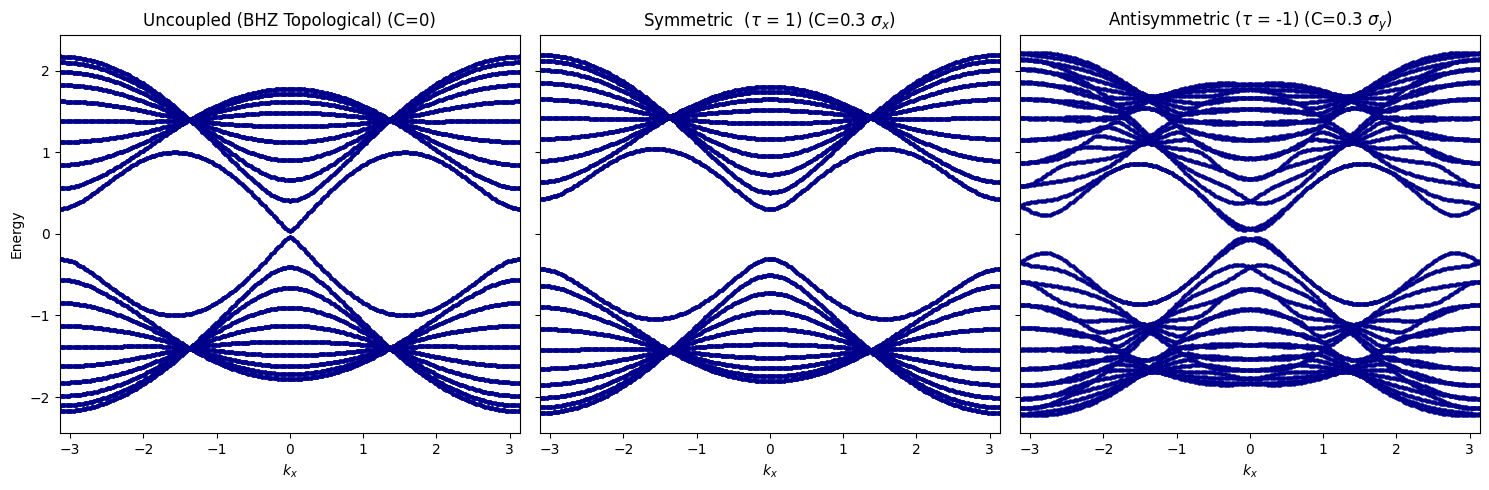

In [6]:
# Model parameters
N = 10       # stripe width
t0 = -1.2    # sublattice potential
C_cases = {
    r"Uncoupled (BHZ Topological) (C=0)": np.zeros((2,2), dtype=complex),
    r"Symmetric  ($\tau$ = 1) (C=0.3 $\sigma_x$)": 0.3 * tau_x,
    r"Antisymmetric ($\tau$ = -1) (C=0.3 $\sigma_y$)": 0.3 * tau_y
}

# Diagonalize along kx
kxs = np.linspace(-np.pi, np.pi, 201)
fig, axes = plt.subplots(1, 3, figsize=(15,5), sharey=True)

for ax, (title, C) in zip(axes, C_cases.items()):
    energies = []
    for kx in kxs:
        H = build_H(kx, C)
        evals, _ = np.linalg.eigh(H)
        energies.append(evals)
    
    energies = np.array(energies)  # shape (len(kxs), N*d)
    
    for n in range(energies.shape[1]):
        ax.scatter(kxs, energies[:, n], color="darkblue", s=5)
    
    ax.set_title(title)
    ax.set_xlabel(r"$k_x$")
    ax.set_xlim(-np.pi, np.pi)

axes[0].set_ylabel("Energy")
plt.tight_layout()
plt.show()

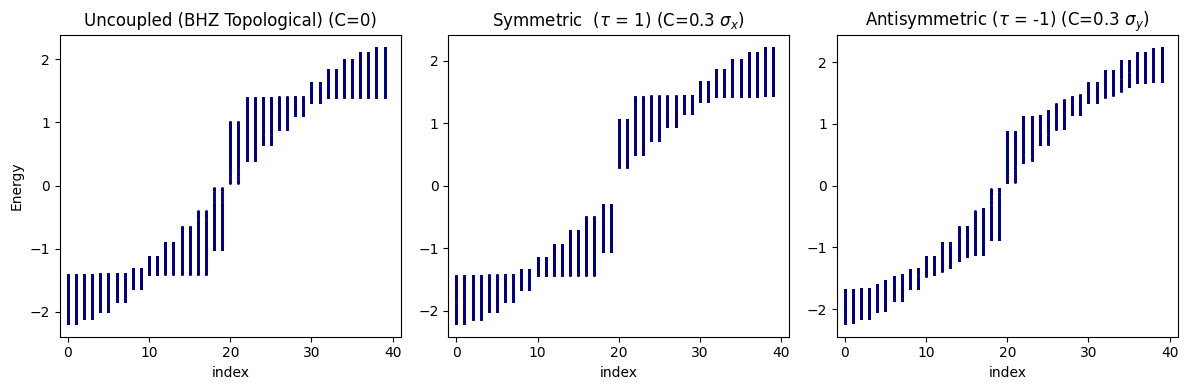

In [7]:
fig, axes = plt.subplots(1, len(C_cases), figsize=(12, 4))

for ax, (title, C) in zip(axes, C_cases.items()):
    energies = []
    for kx in kxs:
        H = build_H(kx, C)
        evals, _ = np.linalg.eigh(H)
        energies.append(evals)
    
    energies = np.array(energies)  # shape (len(kxs), N*d)
    
    # scatter: eigenvalue vs. eigenstate index
    for i in range(energies.shape[1]):
        ax.scatter(np.full(len(kxs), i), energies[:, i], color="darkblue", s=1)
    
    ax.set_title(title)
    ax.set_xlabel("index")
    ax.set_xlim(-1, energies.shape[1]+1)

axes[0].set_ylabel("Energy")
plt.tight_layout()
plt.show()


### Physical Interpretation

* For $t_0 = -1.2$, the bulk Hamiltonian is in the nontrivial regime (like in QWZ).
* Without coupling, BHZ is just two opposite Chern insulators = “QSH state”.
* With symmetric coupling ($\mathcal{T}^2 = +1$): edge states gap out → trivial.
* With antisymmetric coupling ($\mathcal{T}^2 = -1$): edge states remain protected → **quantum spin Hall insulator**.


## Edge States in $\mathcal{T}^2 = -1$ Systems

We are considering a **2D time-reversal invariant (TRI) topological insulator** with **fermionic TR symmetry**

$$
\mathcal{T}^2 = -1,
$$

the case relevant for spin-$\tfrac{1}{2}$ electrons.



### Left–Right Symmetry of Edge Dispersions

* Consider an **edge parallel to the $x$-direction**, with momentum $k_x \in [-\pi, \pi]$.
* Edge states form 1D dispersing bands inside the bulk gap.
* By time-reversal symmetry,

  $$
  E(k_x) = E(-k_x).
  $$
* This enforces that at a given energy inside the gap, the **number of right-movers** $N_C(E)$ must equal the **number of left-movers** $N_-(E)$:

  $$
  N_C(E) = N_-(E).
  $$

So unlike in a Chern insulator (where you can have purely chiral motion), TRI edge states always come in **helical pairs** (counterpropagating modes linked by TR).



### Restriction from Adiabatic Deformations

* Adiabatic deformations that preserve TR symmetry and translational invariance **cannot change** the net number of edge states in the bulk gap (same as in Chern insulators).
* But here, since TR already enforces $N_C = N_-$, the *signed sum* (Chern number) is always zero.
* What survives is a more subtle invariant: **the parity of Kramers pairs**.





### The $\mathbb{Z}_2$ Invariant

* Define total number of edge states at an edge at energy $E$:

  $$
  N(E) = N_C(E) + N_-(E).
  $$
* Each **Kramers pair** consists of two states (one left-, one right-mover).
* So the number of Kramers pairs is

  $$
  \frac{N(E)}{2}.
  $$
* The **parity** of this number defines a **$\mathbb{Z}_2$ topological invariant**:

  $$
  \nu = \frac{N(E)}{2} \;\; \text{mod } 2.
  $$



### Example

* If there is **1 Kramers pair** of helical edge states → odd parity → $\nu = 1$ (topological).
* If there are **2 Kramers pairs** (or any even number) → even parity → $\nu = 0$ (trivial).

This is the essence of **$\mathbb{Z}_2$ classification**:

* $\nu = 1$: Quantum Spin Hall (topological).
* $\nu = 0$: Trivial insulator.




In [8]:
# Calculate edge states and Z2 invariant
def calculate_Z2(H, edge_width=2):
    d = 4
    N_cells = H.shape[0] // d
    evals, evecs = np.linalg.eigh(H)

    # Edge weights
    left_sites = np.arange(0, edge_width*d)
    right_sites = np.arange((N_cells-edge_width)*d, N_cells*d)

    left_weights = np.sum(np.abs(evecs[left_sites,:])**2, axis=0)
    right_weights = np.sum(np.abs(evecs[right_sites,:])**2, axis=0)

    # Count edge states on one edge (e.g., left) with > 60% weight
    threshold = 0.6
    N_edge_left = np.sum(left_weights > threshold)

    # Number of Kramers pairs
    N_kramers = N_edge_left // 2

    # Z2 invariant (parity)
    nu = N_kramers % 2
    return nu, evals, left_weights + right_weights


In [9]:
# Define titles
titles = [
    "Uncoupled (BHZ Topological) (C = 0)",
    "Symmetric Coupling (C = 0.3 tau x)",
    "Antisymmetric Coupling (C = 0.3 tau y)"
]
C_values = [
    np.zeros((2,2), dtype=complex),
    0.3 * tau_x,
    0.3 * tau_y
]

In [10]:
for title, C in zip(titles, C_values):
    H = build_H(kxs[len(kxs)//2], C)  # choose representative kx
    nu, evals, edge_weights = calculate_Z2(H)

    display(Math(rf"\displaystyle \text{{{title}}} \; : \; \mathbb{{Z}}_2 \text{{ invariant }} \nu = {nu}"))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

## Role of Disorder: Absence of Backscattering

* In a Chern insulator: chirality forbids backscattering — no state to scatter into.
* In a TRI $\mathcal{T}^2 = -1$ insulator: there are counterpropagating partners, but **they form a Kramers pair**.
* Time-reversal symmetry implies:

  $$
  \langle \psi | V | \mathcal{T}\psi \rangle = 0
  $$

  for any **TR-symmetric potential $V$**.
* This forbids **elastic backscattering within a Kramers pair**.

So:

* Disorder that preserves TR symmetry cannot gap out or localize the edge states.
* Only **TR-breaking perturbations** (e.g., magnetic impurities) can open a gap in the helical edge spectrum.

This is why the helical edges of a $\nu=1$ system are called **topologically protected**.

---